# Exercise 5: Using YOLO for Object Detection

## Objective
Use a pretrained YOLO (You Only Look Once) model to detect objects in an image.

We will:
- Load the YOLO26n Nano model (optimized for speed)
- Run detection on an image (with a fallback if the file is missing)
- specific bounding box coordinates
- Interpret model confidence scores

In [3]:
# Install Ultralytics YOLO
!pip install -q ultralytics opencv-python


0: 640x480 4 persons, 1 bus, 1463.7ms
Speed: 4.5ms preprocess, 1463.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


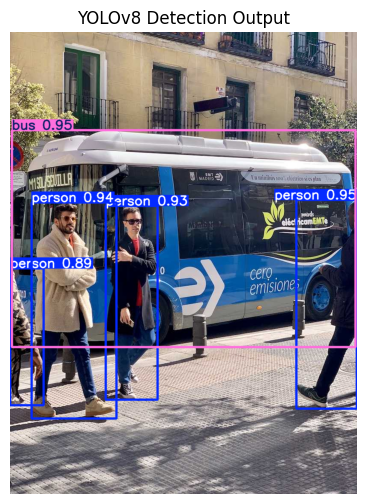

In [8]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import urllib.request

# 1. Load Model
# 'yolo26n.pt' will automatically download if not present
model = YOLO("yolo26n.pt")

# 2. Robust Image Loading
image_path = "test.jpg"
if not os.path.exists(image_path):
    print("Note: 'test.jpg' not found. Downloading a sample image...")
    # Download a standard sample image (bus.jpg is a classic YOLO sample)
    url = "https://ultralytics.com/images/bus.jpg"
    urllib.request.urlretrieve(url, image_path)

img = cv2.imread(image_path)

# 3. Run Inference
# We strictly check if image loaded to avoid NoneType crash
if img is None:
    raise ValueError(f"Failed to load {image_path}. Check file integrity.")

results = model(img)

# 4. Visualize
# plot() returns a BGR numpy array
annotated_bgr = results[0].plot()
annotated_rgb = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(annotated_rgb)
plt.axis("off")
plt.title("YOLOv8 Detection Output")
plt.show()

## Inspect Detection Output

The model returns a list of Result objects. We extract the bounding boxes (`xyxy`), class IDs (`cls`), and confidence (`conf`).

In [9]:
# Get the class names dictionary (e.g., {0: 'person', 5: 'bus'})
names = model.names

print(f"Found {len(results[0].boxes)} objects:\n")

for box in results[0].boxes:
    class_id = int(box.cls[0])
    confidence = float(box.conf[0])

    # Get coordinates (x_min, y_min, x_max, y_max)
    x1, y1, x2, y2 = box.xyxy[0].tolist()

    label = names[class_id]

    print(f"Object: {label.upper()}")
    print(f"Confidence: {confidence:.2f}")
    print(f"Box: [{x1:.1f}, {y1:.1f}, {x2:.1f}, {y2:.1f}]")
    print("---")

Found 5 objects:

Object: BUS
Confidence: 0.95
Box: [4.3, 229.2, 806.7, 736.4]
---
Object: PERSON
Confidence: 0.95
Box: [668.7, 392.1, 809.6, 880.8]
---
Object: PERSON
Confidence: 0.94
Box: [50.2, 398.8, 248.5, 903.9]
---
Object: PERSON
Confidence: 0.93
Box: [223.6, 406.2, 344.9, 859.9]
---
Object: PERSON
Confidence: 0.89
Box: [0.1, 552.1, 78.9, 872.6]
---
